# Data tidying

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
db = pd.read_csv('data/player_stats_injuries.csv')
db.head()

,PLAYER_ID,PLAYER_NAME,SEASON,SEASON_NUM,AGE,PLAYER_HEIGHT_INCHES,PLAYER_WEIGHT,GP,MIN,USG_PCT,...,AVG_SEC_PER_TOUCH,AVG_DRIB_PER_TOUCH,ELBOW_TOUCHES,POST_TOUCHES,PAINT_TOUCHES,TEAM,INJURED ON,RETURNED,DAYS MISSED,INJURED_TYPE
0,1630639,A.J. Lawson,22-23,22.5,22.0,78,179,13,4.8,0.182,...,1.39,0.62,0.0,0.0,0.2,NaN,NaN,NaN,NaN,NaN
1,1631260,AJ Green,22-23,22.5,23.0,77,190,32,9.4,0.160,...,2.61,1.84,0.1,0.0,0.3,NaN,NaN,NaN,NaN,NaN
2,1631100,AJ Griffin,22-23,22.5,19.0,78,220,66,19.4,0.174,...,2.08,1.49,0.4,0.0,0.7,NaN,NaN,NaN,NaN,NaN
3,203932,Aaron Gordon,22-23,22.5,27.0,80,235,61,30.1,0.206,...,2.94,2.11,1.8,2.1,6.8,Nuggets,2023-02-02,2023-02-07,5.0,Sprained_ankle
4,1628988,Aaron Holiday,22-23,22.5,26.0,72,185,57,13.7,0.128,...,4.17,3.82,0.1,0.0,0.4,NaN,NaN,NaN,NaN,NaN


### Check for duplication

In [4]:
duplicates = db[db.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [PLAYER_ID, PLAYER_NAME, SEASON, SEASON_NUM, AGE, PLAYER_HEIGHT_INCHES, PLAYER_WEIGHT, GP, MIN, USG_PCT, PACE, POSS, FGA_PG, DRIVES, DRIVE_FGA, DRIVE_PASSES, DIST_MILES, AVG_SPEED, PULL_UP_FGA, PULL_UP_FG3A, TOUCHES, FRONT_CT_TOUCHES, AVG_SEC_PER_TOUCH, AVG_DRIB_PER_TOUCH, ELBOW_TOUCHES, POST_TOUCHES, PAINT_TOUCHES, TEAM, INJURED ON, RETURNED, DAYS MISSED, INJURED_TYPE]
Index: []

[0 rows x 32 columns]


No duplicates were found.
But, we noticed that there is data for the same players but from different seasons.

### Missing values

In [5]:
db_missing = pd.DataFrame([
    {
        'column': col,
        'missing': (db[col].astype(str).str.strip() == 'None').sum() + (db[col].isna()).sum(),
        'total': len(db[col]),
        'percentage': ((db[col].astype(str).str.strip() == 'None').sum()  + (db[col].isna()).sum()) / len(db[col])
    }
    for col in db.columns
])
print("Missing values in columns:")
display(db_missing[db_missing['missing'] > 0])

total_missing_values = ((db.astype(str).apply(lambda x: x.str.strip() == 'None')).sum() + (db.isna()).sum()).sum()
print('Total missing values:\n',total_missing_values)

Missing values in columns:


,column,missing,total,percentage
5,PLAYER_HEIGHT_INCHES,6,5578,0.001076
6,PLAYER_WEIGHT,6,5578,0.001076
16,DIST_MILES,1,5578,0.000179
17,AVG_SPEED,1,5578,0.000179
19,PULL_UP_FG3A,425,5578,0.076192
27,TEAM,4364,5578,0.782359
28,INJURED ON,4364,5578,0.782359
29,RETURNED,4364,5578,0.782359
30,DAYS MISSED,4364,5578,0.782359
31,INJURED_TYPE,4364,5578,0.782359


Total missing values:
 22259


The ``PULL_UP_FG3A`` is the column with most missing values.
In any way, considering the percentages of missing values, these are not crucial.

### Injury severity column

In [6]:
# Define the function to categorize injury severity
def categorize_injury_severity(days_missed):
    if str(days_missed) == "nan":
        return
    if days_missed <= 3:
        return 'Mild'
    elif days_missed <= 7:
        return 'Moderate'
    elif days_missed <= 14:
        return 'Severe'
    else:
        return 'Grave'

db_extended = db.copy()
db_extended['INJURY_SEVERITY'] = db_extended['DAYS MISSED'].apply(categorize_injury_severity)

# Save the updated dataset
db_extended.to_csv('data/player_stats_extended.csv', index=False)

In [7]:
db = pd.read_csv("data/player_stats_extended.csv")
db.head()

,PLAYER_ID,PLAYER_NAME,SEASON,SEASON_NUM,AGE,PLAYER_HEIGHT_INCHES,PLAYER_WEIGHT,GP,MIN,USG_PCT,...,AVG_DRIB_PER_TOUCH,ELBOW_TOUCHES,POST_TOUCHES,PAINT_TOUCHES,TEAM,INJURED ON,RETURNED,DAYS MISSED,INJURED_TYPE,INJURY_SEVERITY
0,1630639,A.J. Lawson,22-23,22.5,22.0,78,179,13,4.8,0.182,...,0.62,0.0,0.0,0.2,NaN,NaN,NaN,NaN,NaN,NaN
1,1631260,AJ Green,22-23,22.5,23.0,77,190,32,9.4,0.160,...,1.84,0.1,0.0,0.3,NaN,NaN,NaN,NaN,NaN,NaN
2,1631100,AJ Griffin,22-23,22.5,19.0,78,220,66,19.4,0.174,...,1.49,0.4,0.0,0.7,NaN,NaN,NaN,NaN,NaN,NaN
3,203932,Aaron Gordon,22-23,22.5,27.0,80,235,61,30.1,0.206,...,2.11,1.8,2.1,6.8,Nuggets,2023-02-02,2023-02-07,5.0,Sprained_ankle,Moderate
4,1628988,Aaron Holiday,22-23,22.5,26.0,72,185,57,13.7,0.128,...,3.82,0.1,0.0,0.4,NaN,NaN,NaN,NaN,NaN,NaN


# Generate new sub DBS for specific use

### Unique players DB

In [8]:
players = pd.DataFrame([
    {
        'id': id,
        'name': name,
        'age': age,
        'height': round(int(height.strip()) * 2.54, 2) if height.strip() != 'None' else None,
        'weight': round(int(weight.strip()) * 0.453592, 2) if weight.strip() != 'None' else None
    }
    for (id, name, age, height, weight) in db[['PLAYER_ID', 'PLAYER_NAME', 'AGE', 'PLAYER_HEIGHT_INCHES', 'PLAYER_WEIGHT']].drop_duplicates(subset='PLAYER_ID').values
])

# players.to_csv('data/players.csv', index=False)
players.head()

,id,name,age,height,weight
0,1630639,A.J. Lawson,22.0,198.12,81.19
1,1631260,AJ Green,23.0,195.58,86.18
2,1631100,AJ Griffin,19.0,198.12,99.79
3,203932,Aaron Gordon,27.0,203.20,106.59
4,1628988,Aaron Holiday,26.0,182.88,83.91


### Unique seasons and injuries DB

In [ ]:
from pandas import NA


seasons = pd.DataFrame([
    {
        'season_id': season,
        'name': f'NBA Season {season}',
        'num_players': len(db[db['SEASON'] == season]['PLAYER_ID'].unique()),
        'num_injuries': len(db[db['SEASON'] == season]),
        **{
            injury_type: len(db[(db['SEASON'] == season) & (db['INJURED_TYPE'] == injury_type)])
            for injury_type in db['INJURED_TYPE'].dropna().unique()
        }
    }
    for season in sorted(db['SEASON'].unique())
])

seasons = seasons.sort_values('season_id') # sort by season_id

# seasons.to_csv('data/seasons.csv', index=False)

seasons.head(10)

,season_id,name,num_players,num_injuries,Sprained_ankle,Sore_knee,Knee_injury,Sore_lower_back,Sore_ankle
0,13-14,NBA Season 13-14,482,483,10,1,0,1,1
1,14-15,NBA Season 14-15,492,506,36,6,4,0,3
2,15-16,NBA Season 15-16,476,485,33,13,2,5,5
3,16-17,NBA Season 16-17,486,514,41,31,3,11,7
4,17-18,NBA Season 17-18,540,567,70,28,0,9,5
5,18-19,NBA Season 18-19,530,589,83,52,10,11,18
6,19-20,NBA Season 19-20,529,583,80,57,10,13,11
7,20-21,NBA Season 20-21,540,619,81,67,34,10,14
8,21-22,NBA Season 21-22,605,702,118,76,13,25,25
9,22-23,NBA Season 22-23,521,530,36,22,10,7,6


### Injury type DBs

In [10]:
injury_types = db['INJURED_TYPE'].unique()
injuries = {}

stats_columns = [
    'PLAYER_ID', 'SEASON', 'GP', 'MIN', 'USG_PCT', 'PACE', 'POSS', 'FGA_PG', 'DRIVES',
    'DRIVE_FGA', 'DRIVE_PASSES', 'DIST_MILES', 'AVG_SPEED',
    'PULL_UP_FGA', 'PULL_UP_FG3A', 'TOUCHES', 'FRONT_CT_TOUCHES',
    'AVG_SEC_PER_TOUCH', 'AVG_DRIB_PER_TOUCH', 'ELBOW_TOUCHES',
    'POST_TOUCHES', 'PAINT_TOUCHES', 'INJURY_SEVERITY'
]

for injury_type in injury_types:
    injuries[injury_type] = db[
        db['INJURED_TYPE'] == injury_type
    ][stats_columns]
    
# for (key, injury) in injuries.items():
#     injury.to_csv(f'data/injuries/{key}.csv', index=False)

Innjury summary per season

In [11]:
seasons = db['SEASON'].unique()

injury_summary_per_season = []
for (key, injury) in injuries.items():
    summary_row = {
        'Injury_Type': key,
        'Total_Injuries': len(injury),
        **{
            f'{season}': len(injury[injury['SEASON'] == season])
            for season in seasons
        }
    }
        
    injury_summary_per_season.append(summary_row)

display(pd.DataFrame(injury_summary_per_season))

,Injury_Type,Total_Injuries,22-23,21-22,20-21,19-20,18-19,17-18,16-17,15-16,14-15,13-14
0,NaN,0,0,0,0,0,0,0,0,0,0,0
1,Sprained_ankle,588,36,118,81,80,83,70,41,33,36,10
2,Sore_knee,353,22,76,67,57,52,28,31,13,6,1
3,Knee_injury,86,10,13,34,10,10,0,3,2,4,0
4,Sore_lower_back,92,7,25,10,13,11,9,11,5,0,1
5,Sore_ankle,95,6,25,14,11,18,5,7,5,3,1


Injury summary per severity

In [12]:
injury_summary_per_severity = []

severities = injury['INJURY_SEVERITY'].unique()

for (key, injury) in injuries.items():
    summary_row = {
        'Injury_Type': key,
        'Total_Injuries': len(injury),
        **{
            f'{severity}': len(injury[injury['INJURY_SEVERITY'] == severity])
            for severity in severities
        }
    }
        
    injury_summary_per_severity.append(summary_row)

display(pd.DataFrame(injury_summary_per_severity))

,Injury_Type,Total_Injuries,Mild,Grave,Moderate,Severe
0,NaN,0,0,0,0,0
1,Sprained_ankle,588,221,100,156,111
2,Sore_knee,353,189,28,96,40
3,Knee_injury,86,51,19,9,7
4,Sore_lower_back,92,46,6,26,14
5,Sore_ankle,95,49,5,32,9


### Team DBs

In [13]:
teams = db['TEAM'].unique()
teams_db = {}

for team in teams:
    teams_db[team] = db[
        db['TEAM'] == team
    ][stats_columns]

# for (key, team) in teams_db.items():
#     team.to_csv(f'data/teams/{key}.csv', index=False)

### Teams summary DB with number of player / season & number of injuries / injury type

In [14]:
teams_summary = []

for (team_name, team_data) in teams_db.items():
    total_players = len(team_data['PLAYER_ID'].unique())
    players_per_season = dict(team_data.groupby('SEASON').size())
    
    team_injuries = db[db['TEAM'] == team_name]
    total_injuries = len(team_injuries)
    
    injuries_by_type = dict(team_injuries['INJURED_TYPE'].value_counts())
    
    summary_row = {
        'Team': team_name,
        'Total_Players': total_players,
        **{
            f'{season}': int(len(team_injuries[team_injuries['SEASON'] == season]))
            for season in seasons
        },
        'Total_Injuries': int(total_injuries),
        **{
            f'{injury_type}': len(team_injuries[team_injuries['INJURED_TYPE'] == injury_type])
            for injury_type in injury_types
        }
    }
    
    teams_summary.append(summary_row)

teams_summary_df = pd.DataFrame(teams_summary)
# teams_summary_df.to_csv('data/teams_summary.csv', index=False)

Only see number of players per team over the seasons

In [15]:
display(teams_summary_df[['Team', 'Total_Players', *list(players_per_season.keys())]].sort_values('Total_Players', ascending=False))

,Team,Total_Players,14-15,15-16,17-18,18-19,19-20,20-21,21-22
8,Cavaliers,28,1,2,6,9,7,7,13
29,Knicks,27,4,6,5,6,3,11,20
12,Thunder,26,2,0,5,5,8,6,13
19,Suns,25,5,2,6,5,8,8,6
5,Pistons,25,0,2,1,8,9,15,4
4,Nets,24,0,0,2,6,5,11,8
11,Raptors,23,2,3,3,9,7,4,9
21,Warriors,23,1,3,10,5,8,4,9
9,Mavericks,23,2,1,5,8,8,4,10
13,Hawks,22,1,1,5,7,5,14,7


Only see the injuries over the injury types

In [16]:
display(teams_summary_df[['Team', 'Total_Injuries', *list(injuries_by_type.keys())]].sort_values('Total_Injuries', ascending=False))

,Team,Total_Injuries,Sprained_ankle,Sore_knee,Sore_ankle,Sore_lower_back,Knee_injury
29,Knicks,70,33,25,3,8,1
28,Celtics,59,23,16,3,4,13
2,Pacers,55,31,13,3,8,0
8,Cavaliers,50,24,12,2,10,2
26,Jazz,50,18,22,4,5,1
17,76ers,47,15,25,4,0,3
11,Raptors,47,17,15,3,6,6
9,Mavericks,46,23,11,5,0,7
18,Bucks,45,18,19,5,1,2
13,Hawks,44,25,11,3,4,1


average days off per injured player:

      INJURED_TYPE  DAYS MISSED
0      Knee_injury    15.279070
1       Sore_ankle     4.873684
2        Sore_knee     6.458924
3  Sore_lower_back     5.891304
4   Sprained_ankle    10.248299


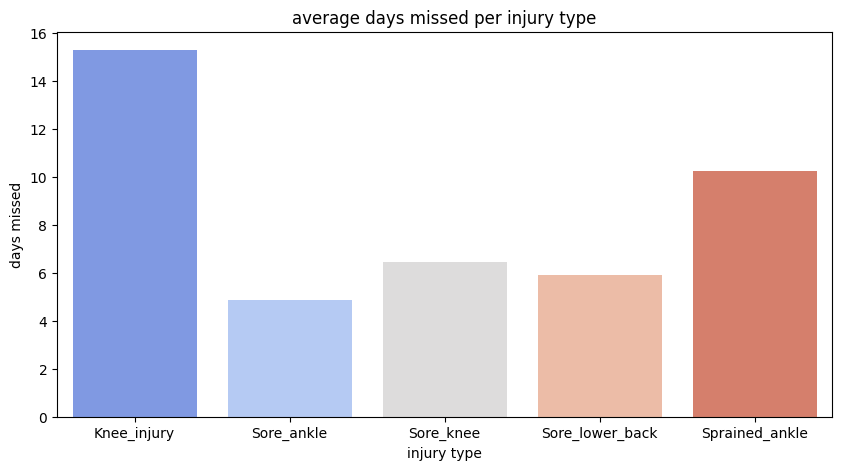

In [17]:
avg_duration = db.groupby('INJURED_TYPE')['DAYS MISSED'].mean().reset_index()
print(avg_duration)

plt.figure(figsize=(10, 5))
sns.barplot(x='INJURED_TYPE', y='DAYS MISSED', hue='INJURED_TYPE', data=avg_duration, palette='coolwarm', legend=False)

plt.xlabel("injury type")
plt.ylabel("days missed")
plt.title("average days missed per injury type")
plt.show()

Korrelation zwischen Verletzung und Spielzeit 

Korrelation zwischen Verletzung und Alter

Vergleich Leistung vor und nach Verletzung

Gibt es eine Korrelation zwischen Verletzung und Position

             DAYS MISSED       MIN
DAYS MISSED     1.000000 -0.127127
MIN            -0.127127  1.000000


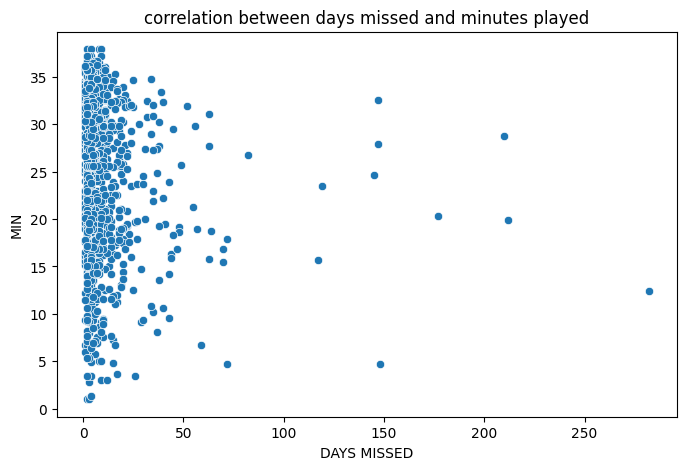

In [18]:
db_filtered = db[['DAYS MISSED', 'MIN']]

korrelation = db_filtered.corr()
print(korrelation)  

plt.figure(figsize=(8, 5))
sns.scatterplot(x=db['DAYS MISSED'], y=db['MIN'])
plt.xlabel("DAYS MISSED")
plt.ylabel("MIN")
plt.title("correlation between days missed and minutes played")
plt.show()


             DAYS MISSED       AGE
DAYS MISSED     1.000000 -0.064678
AGE            -0.064678  1.000000


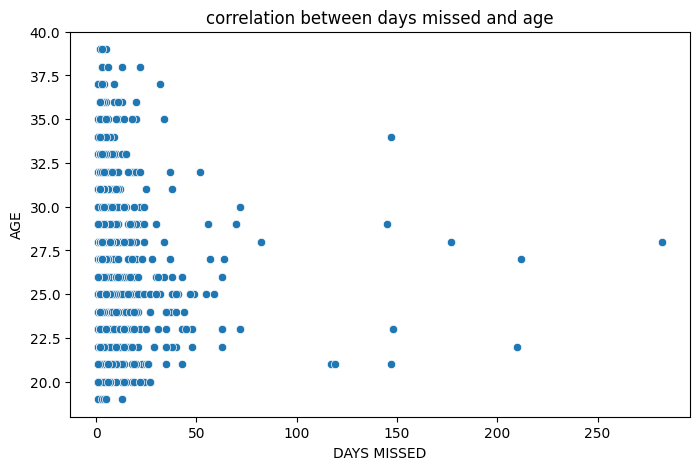

In [19]:
db_filtered = db[['DAYS MISSED', 'AGE']]

korrelation = db_filtered.corr()
print(korrelation)  

plt.figure(figsize=(8, 5))
sns.scatterplot(x=db['DAYS MISSED'], y=db['AGE'])
plt.xlabel("DAYS MISSED")
plt.ylabel("AGE")
plt.title("correlation between days missed and age")
plt.show()

             DAYS MISSED       AGE
DAYS MISSED     1.000000 -0.064678
AGE            -0.064678  1.000000


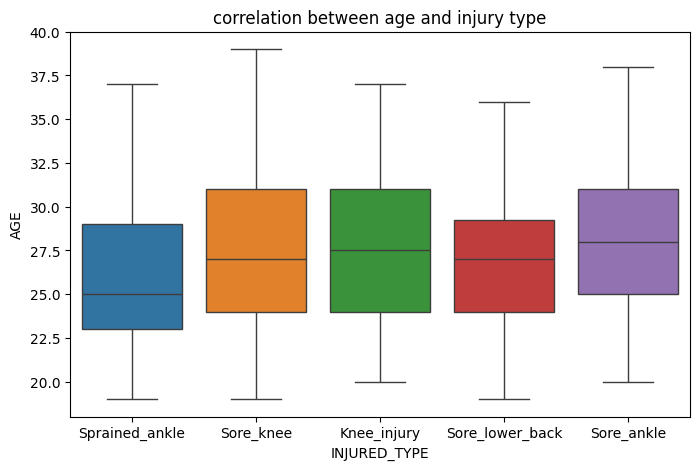

In [20]:
db['INJURED_TYPE-coded'] = db['INJURED_TYPE'].astype('category').cat.codes

correlation = db[['INJURED_TYPE-coded', 'AGE']].corr()
print(korrelation)  

plt.figure(figsize=(8, 5))
sns.boxplot(data=db, x='INJURED_TYPE', y='AGE', hue='INJURED_TYPE', legend=False)
plt.title("correlation between age and injury type")
plt.show()
